# <a id='toc1_'></a>[Projet 1 : Participez  un concours sur la smart City](#toc0_)

![image.png](https://www.notre-planete.info/actualites/images/infrastructures/arbres-Paris.jpg)

**Table of contents**<a id='toc0_'></a>    
- [Projet 1 : Participez  un concours sur la smart City](#toc1_)    
  - [Contexte et règle : Concours Smart City](#toc1_1_)    
  - [Analyse des données](#toc1_2_)    
    - [Importation des librairies](#toc1_2_1_)    
    - [Importation du jeu de données (via fichier ou api)](#toc1_2_2_)    
    - [1ère Inspection du dataset](#toc1_2_3_)    
    - [Vérification des duplicatas](#toc1_2_4_)    
    - [Arbre remarquable](#toc1_2_5_)    
    - [Normalisation noms des colonnes et des variables](#toc1_2_6_)    
    - [Valeurs abérantes (outlier detection)](#toc1_2_7_)    
  - [Analyse graphique](#toc1_3_)    
  - [Analyse Cartographique](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Contexte et règle : Concours Smart City](#toc0_)
Vous avez décidé de participer à un challenge proposé par la ville de Paris ! Voici le cahier des charges du challenge, que vous avez trouvé sur le site :

Dans ce challenge, ouvert à tous, vous allez réaliser une analyse exploratoire avec un jeu de données portant sur les arbres de la ville de Paris, dans le cadre du programme “Végétalisons la ville”.

Vos résultats contribueront à une optimisation des tournées pour l’entretien des arbres de la ville. Eh oui, moins de tournées signifie moins de trajets, et plus d’arbres entretenus.

Vous aurez ainsi un impact réel sur le futur de la ville de Paris !

**Données**: 

Téléchargez le jeu de données des arbres de la ville de Paris. Vous pouvez aussi le consulter dans son contexte sur [opendata.paris.fr](https://opendata.paris.fr/explore/dataset/les-arbres/information/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86838,2.30953&basemap=jawg.streets) 

**Règles du challenge** :

- Si ce n’est pas fait, installez votre environnement de développement sur votre ordinateur, et créez un environnement virtuel dédié à ce challenge.
- Les données doivent être explorées à l’aide de Python et de ses librairies. 
- Vous soumettrez votre analyse sous forme de présentation, contenant les informations suivantes :
- Présentation générale du jeu de données
- Démarche méthodologique d’analyse de données 
- Synthèse de l’analyse de données

- Le second livrable prendra la forme d’un Notebook Jupyter. 
Le Notebook sera documenté pour expliciter les différents traitements, calculs ou graphiques que vous effectuez en utilisant les fonctionnalités d’édition de texte de Jupyter. Vos explications doivent permettre à un public non technique de comprendre les différentes étapes de votre analyse et votre synthèse.

## <a id='toc1_2_'></a>[Analyse des données](#toc0_)

### <a id='toc1_2_1_'></a>[Importation des librairies](#toc0_)

In [1]:
# Library Import
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import branca
import json

### <a id='toc1_2_2_'></a>[Importation du jeu de données (via fichier ou api)](#toc0_)

In [2]:
# Read csv dataset from folder 'dataset' contain CSV with separator ;
df_arbre = pd.read_csv('dataset/les-arbres.csv',sep=";")
# See all columns when use function display
pd.set_option('display.max_columns', None)

In [3]:
# Use API for read CSV dataset without downloading CSV files

# Define the API endpoint URL


api_url = "https://opendata.paris.fr/api/explore/v2.0/catalog/datasets/les-arbres/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=false"

# Make GET request to the API
response = requests.get(api_url)
print(response)
# Check if the request was successful (status code 200)
if response.status_code == 200:

    df_arbre = pd.read_csv(api_url,sep=";")
else:
    print("Request failed with status code:", response.status_code)


<Response [200]>


### <a id='toc1_2_3_'></a>[1ère Inspection du dataset](#toc0_)

Nous allons vérifier que notre Dataframe c'est bien chargé en affichant les deux première ligne de notre Dataframe **df_arbre**

In [4]:
# View 2 first row of dataframe
df_arbre.head(2)

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,202166,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,AVENUE DU TREMBLAY,000501013,Marronnier,Aesculus,n. sp.,NaN,50,10,Jeune (arbre),NON,"48.83666901225874, 2.4524015767260106"
1,255751,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE VERCINGETORIX,000901013,Erable,Acer,pseudoplatanus,NaN,110,10,Jeune (arbre)Adulte,NON,"48.83361919064671, 2.312756587868687"


Regardons maintenant combien de lignes et de colonnes nous avons dans notre dataframe

In [5]:
# See the shape of dataframe
f"Notre dataset contient {df_arbre.shape[0]} lignes et {df_arbre.shape[1]} colonnes pour décrire nos données."

'Notre dataset contient 207594 lignes et 17 colonnes pour décrire nos données.'

Vérifions si les types des données des colonnes sont appropriés

In [6]:
# See types of values in the dataframe
df_arbre.dtypes

idbase                  int64
typeemplacement        object
domanialite            object
arrondissement         object
complementadresse      object
numero                float64
adresse                object
idemplacement          object
libellefrancais        object
genre                  object
espece                 object
varieteoucultivar      object
circonferenceencm       int64
hauteurenm              int64
stadedeveloppement     object
remarquable            object
geo_point_2d           object
dtype: object

Pandas a bien converti nos données dans le bon type il n'aura pas de conversion sur le types de données à faire

Regardons maintenant le taux de valeurs manquantes dans chaque colonnes

In [7]:
# See Nan values on dataframe
df_arbre.isna().mean()

idbase                0.000000
typeemplacement       0.000000
domanialite           0.000000
arrondissement        0.000000
complementadresse     0.721909
numero                1.000000
adresse               0.000000
idemplacement         0.000000
libellefrancais       0.005843
genre                 0.000010
espece                0.011946
varieteoucultivar     0.808771
circonferenceencm     0.000000
hauteurenm            0.000000
stadedeveloppement    0.228663
remarquable           0.109073
geo_point_2d          0.000000
dtype: float64

Observation sur les valeurs manquantes : 
- La colonne **typeemplacement** contient seulement mention 'Arbre' pour chaque valeur (colonne à supprimer)
- La colonne **numero** contient que des valeurs nulles (colonne à supprimer)
- La colonne **complementadresse** contient **72%** de valeurs nulle, cette colonne ne nous servira pas pour notre analyse (colonne à supprimer)

### <a id='toc1_2_4_'></a>[Vérification des duplicatas](#toc0_)
Chaque arbre de paris a un identifiant unique valeur contenu dans la colonne **idbase** vérifions que chaque valeurs est bien unique

In [8]:
# Create variable for see all duplicate value in idbase column
duplicated_values = df_arbre[df_arbre['idbase'].duplicated(keep=False)]

# Print the duplicated values to see all values of two
display(duplicated_values)


,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
86696,227160,Arbre,Alignement,PARIS 6E ARRDT,NaN,NaN,PORT DES SAINTS PERES / QUAI MALAQUAIS,000201008,Peuplier,Populus,alba,''Raket'',20,5,Jeune (arbre),NON,"48.85831741176347, 2.3344414199576278"
131939,227160,Arbre,Alignement,PARIS 6E ARRDT,NaN,NaN,PORT DES SAINTS PERES / QUAI MALAQUAIS,000201008,Peuplier,Populus,alba,''Raket'',165,15,NaN,NON,"48.85831741176347, 2.3344414199576278"


In [9]:
# Drop the duplicated values and keep the values with more information
df_arbre = df_arbre.drop_duplicates(keep='first')

Notre dataset contient un seul arbre en double.Nous avons choisi de garder la première valeur car l'arbre qui est compté en double correspond au même arbre qui a grandi.

### <a id='toc1_2_5_'></a>[Arbre remarquable](#toc0_)
La colonne 'remarquable' contient deux valeurs soit 'NON' ou 'OUI' soit 'Nan'. On sait que notre colonne contient environ **10 %** de valeurs nulle.
Pour vérifier le nombre d'arbre remarquable à paris nous allons vérifier nos données grâce a un autre dataset comptabilisant les arbres remarquable [disponible ici](https://opendata.paris.fr/explore/dataset/arbresremarquablesparis/).

- Quesqu'un arbre remarquable ?

Selon l'observatoire des arbres de paris un arbre remarquable se distingue selon plusieurs caractéristiques :
> "La beauté, l’âge, les dimensions, l’histoire, les légendes, les coutumes, la rareté, les curiosités sont autant d’éléments qui permettent d’identifier des arbres hors du commun. Le caractère remarquable d’un arbre reste toutefois librement appréciable."

Comparons maintenant les arbres remarquables de notre dataset avec celui contenant spécifiquement les arbres remarquables

In [10]:
# Compare values of dataset on tree remarquable 

# Use API for read CSV dataset without downloading CSV files

# Define the API endpoint URL
api_url = "https://opendata.paris.fr/api/explore/v2.0/catalog/datasets/arbresremarquablesparis/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=false"

# Make GET request to the API
response = requests.get(api_url)
print(response)
# Check if the request was successful (status code 200)
if response.status_code == 200:

    df_remarquable = pd.read_csv(api_url,sep=";")
else:
    print("Request failed with status code:", response.status_code)
## Create dataframe for this dataset 
df_remarquable['arbres_idbase'] = df_remarquable['arbres_idbase'].astype('int64')
df_remarquable = df_remarquable.sort_values('arbres_idbase')

<Response [200]>


In [11]:
# Create a dataframe with only remarquable trees from df_arbre
df_arbre_remarquable = df_arbre[df_arbre['remarquable'] == 'OUI']
df_remarquable = df_remarquable.rename(columns={"arbres_idbase":"idbase"})
merged_df = pd.merge(df_arbre_remarquable,df_remarquable, on='idbase', how='outer',indicator=True)

In [12]:
df_remarquable.columns

Index(['geom_x_y', 'idbase', 'arbres_domanialite', 'arbres_arrondissement',
       'arbres_complementadresse', 'arbres_numero', 'arbres_adresse',
       'arbres_circonferenceencm', 'arbres_hauteurenm',
       'arbres_stadedeveloppement', 'arbres_pepiniere', 'arbres_genre',
       'arbres_espece', 'arbres_varieteoucultivar', 'arbres_dateplantation',
       'arbres_libellefrancais', 'com_idbase', 'com_idarbre', 'com_site',
       'com_adresse', 'com_complement_adresse', 'com_arrondissement',
       'com_domanialite', 'com_nom_usuel', 'com_nom_latin',
       'com_autorite_taxo', 'com_annee_plantation', 'com_qualification_rem',
       'com_resume', 'com_descriptif', 'com_delib_num', 'com_delib_date',
       'com_label_arbres', 'com_url_pdf', 'com_url_photo1', 'com_copyright1'],
      dtype='object')

In [13]:
df_remarquable = df_remarquable.rename(columns={"arbres_idbase":"idbase"})
merged_df = pd.merge(df_arbre_remarquable,df_remarquable, on='idbase', how='outer',indicator=True)

In [14]:
# Count the number of values are the same in the two dataframes and the different
merged_df['_merge'].value_counts()

both          178
left_only       1
right_only      1
Name: _merge, dtype: int64

In [15]:
# See values present on the left merge dataframe
display(merged_df[merged_df['_merge']=='left_only'])

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,geom_x_y,arbres_domanialite,arbres_arrondissement,arbres_complementadresse,arbres_numero,arbres_adresse,arbres_circonferenceencm,arbres_hauteurenm,arbres_stadedeveloppement,arbres_pepiniere,arbres_genre,arbres_espece,arbres_varieteoucultivar,arbres_dateplantation,arbres_libellefrancais,com_idbase,com_idarbre,com_site,com_adresse,com_complement_adresse,com_arrondissement,com_domanialite,com_nom_usuel,com_nom_latin,com_autorite_taxo,com_annee_plantation,com_qualification_rem,com_resume,com_descriptif,com_delib_num,com_delib_date,com_label_arbres,com_url_pdf,com_url_photo1,com_copyright1,_merge
131,2002393,Arbre,Jardin,BOIS DE BOULOGNE,16-11,NaN,PETITE ILE DU LAC INFERIEUR,000801001,Hêtre,Fagus,sylvatica,''Pendula'',200.0,10.0,Mature,OUI,"48.86136852525107, 2.2589879408743765",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [16]:
# See values present on the right merge dataframe
display(merged_df[merged_df['_merge']=='right_only'])

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,geom_x_y,arbres_domanialite,arbres_arrondissement,arbres_complementadresse,arbres_numero,arbres_adresse,arbres_circonferenceencm,arbres_hauteurenm,arbres_stadedeveloppement,arbres_pepiniere,arbres_genre,arbres_espece,arbres_varieteoucultivar,arbres_dateplantation,arbres_libellefrancais,com_idbase,com_idarbre,com_site,com_adresse,com_complement_adresse,com_arrondissement,com_domanialite,com_nom_usuel,com_nom_latin,com_autorite_taxo,com_annee_plantation,com_qualification_rem,com_resume,com_descriptif,com_delib_num,com_delib_date,com_label_arbres,com_url_pdf,com_url_photo1,com_copyright1,_merge
179,178840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"48.84128069137752, 2.344837586166943",PRIVE,PARIS 5E ARRDT,ESPACE VERT PROTEGE,NaN,EVP N°5-27 / ECOLE NORMALE SUPERIEURE / 45 RUE...,216.0,10.0,M,Inconnue,Morus,n. sp.,NaN,1860-01-01T00:09:21+00:00,Mûrier,178840.0,178840.0,Jardin de l'Ecole Normale Supérieure,45 Rue d'Ulm,ESPACE VERT PROTEGE,5,Espace vert privé,Mûrier commun,Morus sp.,NaN,1860,Historique,Cet arbre est classé remarquable pour son cara...,"En 1860, Louis Pasteur aurait fait planter ce ...",NaN,NaN,NaN,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,NaN,right_only


Pour la suite de notre analyse nous allons utiliser le dataset des arbres remarquables comme références dans notre dataset *df_arbre*. Pour cela nous allons réintégrer dans notre dataset la valeur qui n'est pas présente dans notre dataset de base et supprimer les valeurs qui sont présentes dans note dataset de base mais qui ne sont pas dans le dataset des arbres remarquables. 

In [17]:
merged_df.loc[179,'arbre_domanialite'] = merged_df.loc[179,'domanialite']
merged_df.loc[179,'arbres_arrondissement'] = merged_df.loc[179,'arrondissement']
merged_df.loc[179,'arbres_complementadresse'] = merged_df.loc[179,'complementadresse']
merged_df.loc[179,'arbres_adresse'] = merged_df.loc[179,'adresse']
merged_df.loc[179,'arbres_circonferenceencm'] = merged_df.loc[179,'circonferenceencm']
merged_df.loc[179,'arbres_hauteurenm'] = merged_df.loc[179,'hauteurenm']
merged_df.loc[179,'arbres_stadedeveloppement'] = merged_df.loc[179,'stadedeveloppement']
merged_df.loc[179,'arbres_libellefrancais'] = merged_df.loc[179,'libellefrancais']
merged_df.loc[179,'arbres_genre'] = merged_df.loc[179,'genre']
merged_df.loc[179,'arbres_varieteoucultivar'] = merged_df.loc[179,'varieteoucultivar']
merged_df.loc[179,'arbres_espece'] = merged_df.loc[179,'espece']
merged_df.loc[179,'geom_x_y'] = merged_df.loc[179,'geo_point_2d']
merged_df.loc[179, 'remarquable'] = 'OUI'

In [18]:
# See values present on the right merge dataframe
display(merged_df[merged_df['_merge']=='right_only'])

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,geom_x_y,arbres_domanialite,arbres_arrondissement,arbres_complementadresse,arbres_numero,arbres_adresse,arbres_circonferenceencm,arbres_hauteurenm,arbres_stadedeveloppement,arbres_pepiniere,arbres_genre,arbres_espece,arbres_varieteoucultivar,arbres_dateplantation,arbres_libellefrancais,com_idbase,com_idarbre,com_site,com_adresse,com_complement_adresse,com_arrondissement,com_domanialite,com_nom_usuel,com_nom_latin,com_autorite_taxo,com_annee_plantation,com_qualification_rem,com_resume,com_descriptif,com_delib_num,com_delib_date,com_label_arbres,com_url_pdf,com_url_photo1,com_copyright1,_merge,arbre_domanialite
179,178840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUI,NaN,NaN,PRIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inconnue,NaN,NaN,NaN,1860-01-01T00:09:21+00:00,NaN,178840.0,178840.0,Jardin de l'Ecole Normale Supérieure,45 Rue d'Ulm,ESPACE VERT PROTEGE,5,Espace vert privé,Mûrier commun,Morus sp.,NaN,1860,Historique,Cet arbre est classé remarquable pour son cara...,"En 1860, Louis Pasteur aurait fait planter ce ...",NaN,NaN,NaN,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,https://capgeo.sig.paris.fr/PdfEtImages/Arbres...,NaN,right_only,NaN


In [19]:
display(df_arbre)

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,202166,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,AVENUE DU TREMBLAY,000501013,Marronnier,Aesculus,n. sp.,NaN,50,10,Jeune (arbre),NON,"48.83666901225874, 2.4524015767260106"
1,255751,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE VERCINGETORIX,000901013,Erable,Acer,pseudoplatanus,NaN,110,10,Jeune (arbre)Adulte,NON,"48.83361919064671, 2.312756587868687"
2,301700,Arbre,Alignement,PARIS 13E ARRDT,NaN,NaN,AVENUE D ITALIE,000301006,Arbre aux quarante écus,Ginkgo,biloba,NaN,20,4,Jeune (arbre),NON,"48.827350558463515, 2.3570541465483603"
3,2016332,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,03150083,Chêne,Quercus,robur,NaN,0,0,NaN,NON,"48.83923820428551, 2.446797303461692"
4,2024150,Arbre,Jardin,BOIS DE VINCENNES,L-10,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,02-719480734,Céphalotaxe,Cephalotaxus,fortunei,NaN,0,0,NaN,NON,"48.821752524000956, 2.4566665648108064"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207589,149437,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE PRINCIPALE / DIV 56,A14000056005,Marronnier,Aesculus,hippocastanum,NaN,210,20,Mature,NON,"48.90456532236302, 2.4079853730492036"
207590,151462,Arbre,CIMETIERE,HAUTS-DE-SEINE,NaN,NaN,CIMETIERE DE BAGNEUX / AVENUE DE L''AULNAIE / ...,A03200097008,Aulne,Alnus,cordata,NaN,0,0,NaN,NaN,"48.803089841417496, 2.3068166091259066"
207591,268857,Arbre,Alignement,PARIS 11E ARRDT,5,NaN,BOULEVARD VOLTAIRE,000101006,Tilleul,Tilia,x europaea,''Euchlora'',40,5,Jeune (arbre),NON,"48.866292739417844, 2.3660426755229693"
207592,270888,Arbre,Alignement,PARIS 13E ARRDT,NaN,NaN,BOULEVARD VINCENT AURIOL,001705003,Platane,Platanus,occidentalis,NaN,100,15,Adulte,NON,"48.831832056657085, 2.359668841446135"


### <a id='toc1_2_6_'></a>[Normalisation noms des colonnes et des variables](#toc0_)
Pour plus de claretées et de facilité nous allons modifier le nom de certaines colonnes.


In [20]:
# Change column to lowercase
df_arbre.columns = df_arbre.columns.str.lower()
# change name of columns
df_arbre = df_arbre.rename(columns = {'circonferenceencm':'circonference'})
df_arbre = df_arbre.rename(columns = {'hauteurenm':'hauteur'})
df_arbre = df_arbre.rename(columns = {'lieu / adresse':'adresse'})
# Change column to capitalize values multiple columns with lambda function
df_arbre[['arrondissement', 'adresse']] = df_arbre[['arrondissement', 'adresse']].astype(str).apply(lambda col: col.str.capitalize())
# Remove a part of a string in column arrondissement
df_arbre['arrondissement'] = df_arbre['arrondissement'].str.replace('arrdt', '')

In [21]:
display(df_arbre)

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonference,hauteur,stadedeveloppement,remarquable,geo_point_2d
0,202166,Arbre,Alignement,Bois de vincennes,NaN,NaN,Avenue du tremblay,000501013,Marronnier,Aesculus,n. sp.,NaN,50,10,Jeune (arbre),NON,"48.83666901225874, 2.4524015767260106"
1,255751,Arbre,Alignement,Paris 14e,NaN,NaN,Rue vercingetorix,000901013,Erable,Acer,pseudoplatanus,NaN,110,10,Jeune (arbre)Adulte,NON,"48.83361919064671, 2.312756587868687"
2,301700,Arbre,Alignement,Paris 13e,NaN,NaN,Avenue d italie,000301006,Arbre aux quarante écus,Ginkgo,biloba,NaN,20,4,Jeune (arbre),NON,"48.827350558463515, 2.3570541465483603"
3,2016332,Arbre,Jardin,Bois de vincennes,NaN,NaN,Parc floral de paris / route de la pyramide,03150083,Chêne,Quercus,robur,NaN,0,0,NaN,NON,"48.83923820428551, 2.446797303461692"
4,2024150,Arbre,Jardin,Bois de vincennes,L-10,NaN,Arboretum de l ecole du breuil - route de la f...,02-719480734,Céphalotaxe,Cephalotaxus,fortunei,NaN,0,0,NaN,NON,"48.821752524000956, 2.4566665648108064"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207589,149437,Arbre,CIMETIERE,Seine-saint-denis,NaN,NaN,Cimetiere de pantin / avenue principale / div 56,A14000056005,Marronnier,Aesculus,hippocastanum,NaN,210,20,Mature,NON,"48.90456532236302, 2.4079853730492036"
207590,151462,Arbre,CIMETIERE,Hauts-de-seine,NaN,NaN,Cimetiere de bagneux / avenue de l''aulnaie / ...,A03200097008,Aulne,Alnus,cordata,NaN,0,0,NaN,NaN,"48.803089841417496, 2.3068166091259066"
207591,268857,Arbre,Alignement,Paris 11e,5,NaN,Boulevard voltaire,000101006,Tilleul,Tilia,x europaea,''Euchlora'',40,5,Jeune (arbre),NON,"48.866292739417844, 2.3660426755229693"
207592,270888,Arbre,Alignement,Paris 13e,NaN,NaN,Boulevard vincent auriol,001705003,Platane,Platanus,occidentalis,NaN,100,15,Adulte,NON,"48.831832056657085, 2.359668841446135"


In [22]:
display(df_arbre)

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonference,hauteur,stadedeveloppement,remarquable,geo_point_2d
0,202166,Arbre,Alignement,Bois de vincennes,NaN,NaN,Avenue du tremblay,000501013,Marronnier,Aesculus,n. sp.,NaN,50,10,Jeune (arbre),NON,"48.83666901225874, 2.4524015767260106"
1,255751,Arbre,Alignement,Paris 14e,NaN,NaN,Rue vercingetorix,000901013,Erable,Acer,pseudoplatanus,NaN,110,10,Jeune (arbre)Adulte,NON,"48.83361919064671, 2.312756587868687"
2,301700,Arbre,Alignement,Paris 13e,NaN,NaN,Avenue d italie,000301006,Arbre aux quarante écus,Ginkgo,biloba,NaN,20,4,Jeune (arbre),NON,"48.827350558463515, 2.3570541465483603"
3,2016332,Arbre,Jardin,Bois de vincennes,NaN,NaN,Parc floral de paris / route de la pyramide,03150083,Chêne,Quercus,robur,NaN,0,0,NaN,NON,"48.83923820428551, 2.446797303461692"
4,2024150,Arbre,Jardin,Bois de vincennes,L-10,NaN,Arboretum de l ecole du breuil - route de la f...,02-719480734,Céphalotaxe,Cephalotaxus,fortunei,NaN,0,0,NaN,NON,"48.821752524000956, 2.4566665648108064"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207589,149437,Arbre,CIMETIERE,Seine-saint-denis,NaN,NaN,Cimetiere de pantin / avenue principale / div 56,A14000056005,Marronnier,Aesculus,hippocastanum,NaN,210,20,Mature,NON,"48.90456532236302, 2.4079853730492036"
207590,151462,Arbre,CIMETIERE,Hauts-de-seine,NaN,NaN,Cimetiere de bagneux / avenue de l''aulnaie / ...,A03200097008,Aulne,Alnus,cordata,NaN,0,0,NaN,NaN,"48.803089841417496, 2.3068166091259066"
207591,268857,Arbre,Alignement,Paris 11e,5,NaN,Boulevard voltaire,000101006,Tilleul,Tilia,x europaea,''Euchlora'',40,5,Jeune (arbre),NON,"48.866292739417844, 2.3660426755229693"
207592,270888,Arbre,Alignement,Paris 13e,NaN,NaN,Boulevard vincent auriol,001705003,Platane,Platanus,occidentalis,NaN,100,15,Adulte,NON,"48.831832056657085, 2.359668841446135"


### <a id='toc1_2_7_'></a>[Valeurs abérantes (outlier detection)](#toc0_)


Text(0.5, 1.0, 'Distribution circonference en cm')

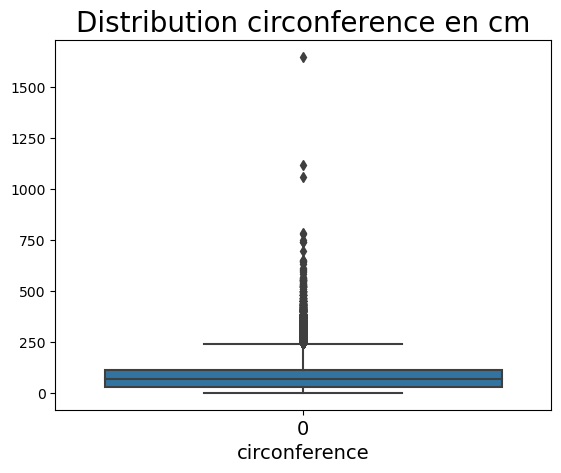

In [23]:
# box plot of the variable height
ax = sns.boxplot(df_arbre.circonference)

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('circonference', fontsize=14)
plt.title('Distribution circonference en cm', fontsize=20)

Text(0.5, 1.0, 'Distribution hauteur en cm')

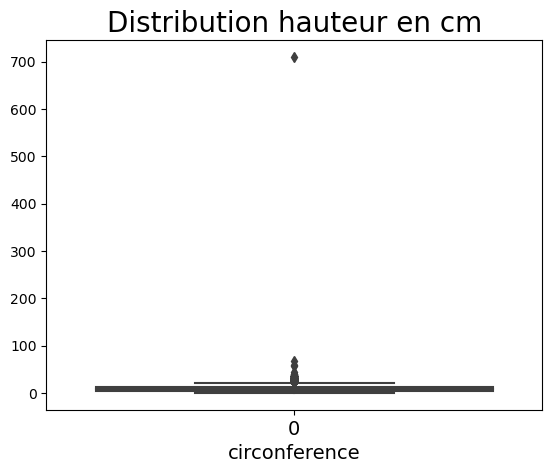

In [24]:
# box plot of the variable height
ax = sns.boxplot(df_arbre.hauteur)

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('circonference', fontsize=14)
plt.title('Distribution hauteur en cm', fontsize=20)

<Axes: xlabel='circonference', ylabel='hauteur'>

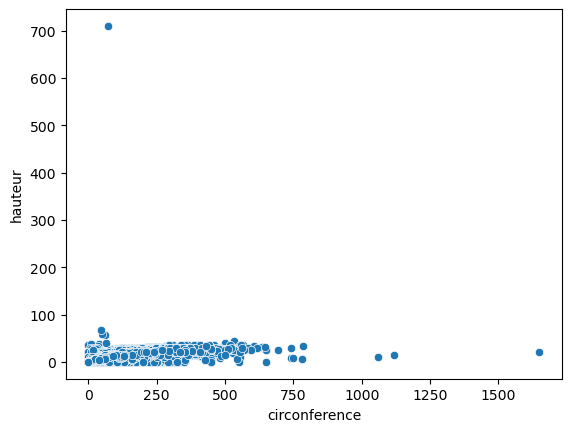

In [25]:
sns.scatterplot(x='circonference', y='hauteur', data=df_arbre)

## <a id='toc1_3_'></a>[Analyse graphique](#toc0_)

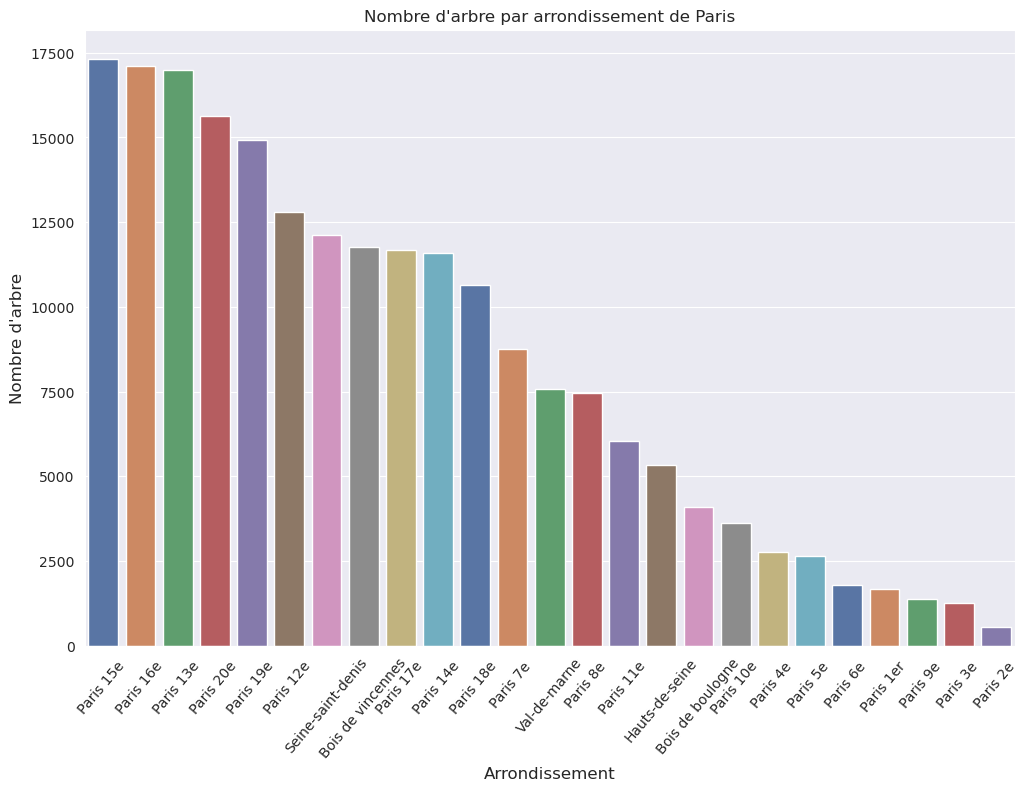

In [26]:
# Set theme
sns.set_style('darkgrid')
palette = sns.color_palette("deep")
# Set the figure size
plt.figure(figsize=(12, 8))
sns.countplot(x=df_arbre["arrondissement"],order=df_arbre["arrondissement"].value_counts().index,palette=palette)

plt.xlabel('Arrondissement',fontsize=12)
# Rotate x-axis labels vertically
plt.xticks(rotation=50)
plt.ylabel("Nombre d'arbre",fontsize=12)
# Add title for the plot
plt.title("Nombre d'arbre par arrondissement de Paris")
plt.show()

## <a id='toc1_4_'></a>[Analyse Cartographique](#toc0_)

In [27]:
df_arbre[['latitude', 'longitude']] = df_arbre['geo_point_2d'].str.split(',', expand=True).astype(float)

# Calculate the mean of latitude and longitude
mean_latitude = df_arbre['latitude'].mean()
mean_longitude = df_arbre['longitude'].mean()

# Print the mean values
print("Mean Latitude:", mean_latitude)
print("Mean Longitude:", mean_longitude)

Mean Latitude: 48.85509459337474
Mean Longitude: 2.3483492841121736


In [28]:
def arbre_html(row):
    i = row
    
    Id_Arbre = df_arbre['idbase'].iloc[i]                             
    Arrondissement = df_arbre['arrondissement'].iloc[i]                           
    Libellé = df_arbre['libellefrancais'].iloc[i]
    genre = df_arbre['genre'].iloc[i]                                           
    stade_developpement = df_arbre['stadedeveloppement'].iloc[i]                               
    remarquable = df_arbre['remarquable'].iloc[i]                             
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>

<head>
<h4 style="margin-bottom:0"; width="300px">{}</h4>""" + """

</head>
    <table style="height: 126px; width: 300px;">
<tbody>

<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Id Arbre</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Id_Arbre) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Arrondissement</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Arrondissement) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Libellé</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Libellé) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Genre</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(genre) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">stade_developpement</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(stade_developpement) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Arbre Remarquable</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(remarquable) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [29]:
# Create a map with folium use mean latitude and longitude for center the map
map = folium.Map(location=[df_arbre.latitude.mean(),df_arbre.longitude.mean()], zoom_start=13, control_scale=True)
# Create a marker cluster
marker_cluster = MarkerCluster().add_to(map)
# Add markers to the map
for index, row in df_arbre.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['idbase']).add_to(marker_cluster)
# Generate the map
map.save('map_arbre.html')

In [30]:
# map = folium.Map(location=[df_arbre.latitude.mean(),df_arbre.longitude.mean()], zoom_start=13, control_scale=True)
# # Create a marker cluster
# marker_cluster = MarkerCluster().add_to(map)
# for i in range(0,len(df_arbre)):
#     html = arbre_html(i)
#     iframe = branca.element.IFrame(html=html,width=400,height=300)
#     popup = folium.Popup(iframe,parse_html=True)
#     folium.Marker(location=[row['latitude'], row['longitude']], popup=popup).add_to(marker_cluster)
# map.save('map_test_arbre.html')

## Import arrondissement 

In [31]:
# Use API for read CSV dataset without downloading CSV files

# Define the API endpoint URL


api_url = "https://opendata.paris.fr/api/explore/v2.0/catalog/datasets/arrondissements/exports/geojson"

# Make GET request to the API
response = requests.get(api_url)
print(response)
# Check if the request was successful (status code 200)
if response.status_code == 200:

     # Parse the JSON data from the response
    arrondissement_data = response.json()
    
else:
    print("Request failed with status code:", response.status_code)


<Response [200]>


In [32]:

geo_arrondissement = pd.DataFrame({
    "Arrondissement" : [arr["properties"]["c_ar"] for arr in arrondissement_data["features"]], 
    "Surface" : [arr["properties"]["surface"] for arr in arrondissement_data["features"]]
})
geo_arrondissement

,Arrondissement,Surface
0,7,4.090057e+06
1,8,3.880036e+06
2,15,8.494994e+06
3,1,1.824613e+06
4,3,1.170883e+06
5,11,3.665442e+06
6,2,9.911537e+05
7,18,5.996051e+06
8,9,2.178303e+06
9,10,2.891739e+06


In [33]:
geo_arrondissement_16 = geo_arrondissement[(geo_arrondissement['Arrondissement'] == 16)]
display(geo_arrondissement_16)

,Arrondissement,Surface
15,16,1.637254e+07


In [ ]:
centre = [48.86, 2.35]
carte = folium.Map(location = centre, zoom_start = 12)
carte.choropleth(geo_data = arrondissement_data)
carte

In [99]:
df_arbre_arrondissement = df_arbre.groupby('arrondissement').size().reset_index(name='nombre_arbre')
df_arbre_arrondissement = pd.DataFrame(df_arbre_arrondissement, columns =['arrondissement','nombre_arbre'])
# Drop rows outisde paris by index 
df_arbre_arrondissement = df_arbre_arrondissement.drop([2,23,24])
# Change name of arrondissement for match with geo_json arrondissement


In [96]:
display(df_arbre_arrondissement)

,arrondissement,nombre_arbre
0,Bois de boulogne,4099
1,Bois de vincennes,11763
3,Paris 10e,3618
4,Paris 11e,6048
5,Paris 12e,12809
6,Paris 13e,17002
7,Paris 14e,11592
8,Paris 15e,17315
9,Paris 16e,17121
10,Paris 17e,11679


In [100]:
# Sum together value of tress to 16ème arrondissement and Bois de boulogne
arbre_16_arrondissement = df_arbre_arrondissement.loc[[0,9]].sum()
# Transform the result of sum to series to dataframe for add this rows in dataframe
df_16 = arbre_16_arrondissement.to_frame().transpose()
# Rename values 
# Renommer une valeur
df_16.loc[0, 'arrondissement'] = '16'
# Make same this for other value 
arbre_16_arrondissement = df_arbre_arrondissement.loc[[0,9]].sum()
# Transform the result of sum to series to dataframe for add this rows in dataframe
df_16 = arbre_16_arrondissement.to_frame().transpose()
# Rename values 
# Renommer une valeur
df_16.loc[0, 'arrondissement'] = '16'
df_arbre_arrondissement = df_arbre_arrondissement.append(df_16,ignore_index=True)

# Make same thing for Bois de vincenne and 12ème arrondissement 
# Sum together value of tress to 16ème arrondissement and Bois de boulogne
arbre_12_arrondissement = df_arbre_arrondissement.loc[[1,5]].sum()
# Transform the result of sum to series to dataframe for add this rows in dataframe
df_12 = arbre_12_arrondissement.to_frame().transpose()
# Rename values 
# Renommer une valeur
df_12.loc[0, 'arrondissement'] = '16'
# Make same this for other value 
arbre_12_arrondissement = df_arbre_arrondissement.loc[[0,9]].sum()
# Transform the result of sum to series to dataframe for add this rows in dataframe
df_12 = arbre_12_arrondissement.to_frame().transpose()
# Rename values 
# Renommer une valeur
df_12.loc[0, 'arrondissement'] = '12'
df_arbre_arrondissement = df_arbre_arrondissement.append(df_12,ignore_index=True)

/tmp/ipykernel_11582/3367076153.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_arbre_arrondissement = df_arbre_arrondissement.append(df_16,ignore_index=True)
/tmp/ipykernel_11582/3367076153.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_arbre_arrondissement = df_arbre_arrondissement.append(df_12,ignore_index=True)


In [101]:
display(df_arbre_arrondissement)

,arrondissement,nombre_arbre
0,Bois de boulogne,4099
1,Bois de vincennes,11763
2,Paris 10e,3618
3,Paris 11e,6048
4,Paris 12e,12809
5,Paris 13e,17002
6,Paris 14e,11592
7,Paris 15e,17315
8,Paris 16e,17121
9,Paris 17e,11679


In [ ]:
carte = folium.Map(location = centre, zoom_start = 12)
folium.Choropleth(geo_data = arrondissement_data, name="choropleth",key_on = "feature.properties.c_ar",
                 data = df_arbre_arrondissement, columns = ["arrondissement", "effectif"],
                 fill_color= "YlGn",
                 legend_name = "Nombre de mobiliers par quartier").add_to(carte)
carte